# Estimating Obesity Levels Based on Eating Habits and Physical Condition

Data Source: [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)

Description: Data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

## Variables

### Features:

- **Gender**: binary (Male, Female)
- **Age**: numeric
- **Height**: numeric
- **Weight**: numeric
- **Family history with overweight**: binary (yes, no)
- **FAVC (Frequent consumption of high caloric food)**: binary (yes, no)
- **FCVC (Frequent consumption of vegetables)**: 1, 2, or 3 (treated as numeric in the dataset)
- **NCP (Number of main meals)**: 1, 2, 3, or 4 (treated as numeric in the dataset)
- **CAEC (Consumption of food between meals)**: categorical (No, Sometimes, Frequently, Always)
- **SMOKE**: binary (yes, no)
- **CH2O (Consumption of water daily)** - 1, 2, or 3 (treated as numeric)
- **SCC (Calories consumption monitoring)** - binary (yes, no)
- **FAF (Physical activity frequency)** - 0, 1, 2, or 3 (treated as numeric)
- **TUE (Time using technology devices)** - 0, 1, or 2 (treated as numeric)
- **CALC (Consumption of alcohol)** - categorical (No, Sometimes, Frequently, Always)
- **MTRANS (Transportation used)** - categorical (Automobile, Motorbike, and Public_Transportation, Walking)

### Target:

- **NObeyesdad (Obesity level)**: categorical (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III)

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import pprint as pp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Data Summary Statistics

In [ ]:
# import data
obesity = pd.read_csv("https://archive.ics.uci.edu/static/public/544/data.csv")
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
# reorder target variable (NObeyesdad) for logical plot order
obesity['NObeyesdad'] = pd.Categorical(obesity['NObeyesdad'], categories=[
    'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
    'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
    'Obesity_Type_III'], ordered=True)

# get summary statistics for numeric and categorical columns
numeric_summary = obesity.describe()
categorical_summary = obesity.select_dtypes(include=['object']).describe()

# numeric summary styled
styled_numeric = numeric_summary.style.format("{:.2f}").set_properties(
    **{'background-color': '#d0e1f2',
        'color': 'black'})

# categorical summary styled
styled_categorical = categorical_summary.style.set_properties(
    **{'background-color': '#d0e1f2',
        'color': 'black'})

# display both
display(styled_numeric)
display(styled_categorical)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
count,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
freq,1068,1726,1866,1765,2067,2015,1401,1580


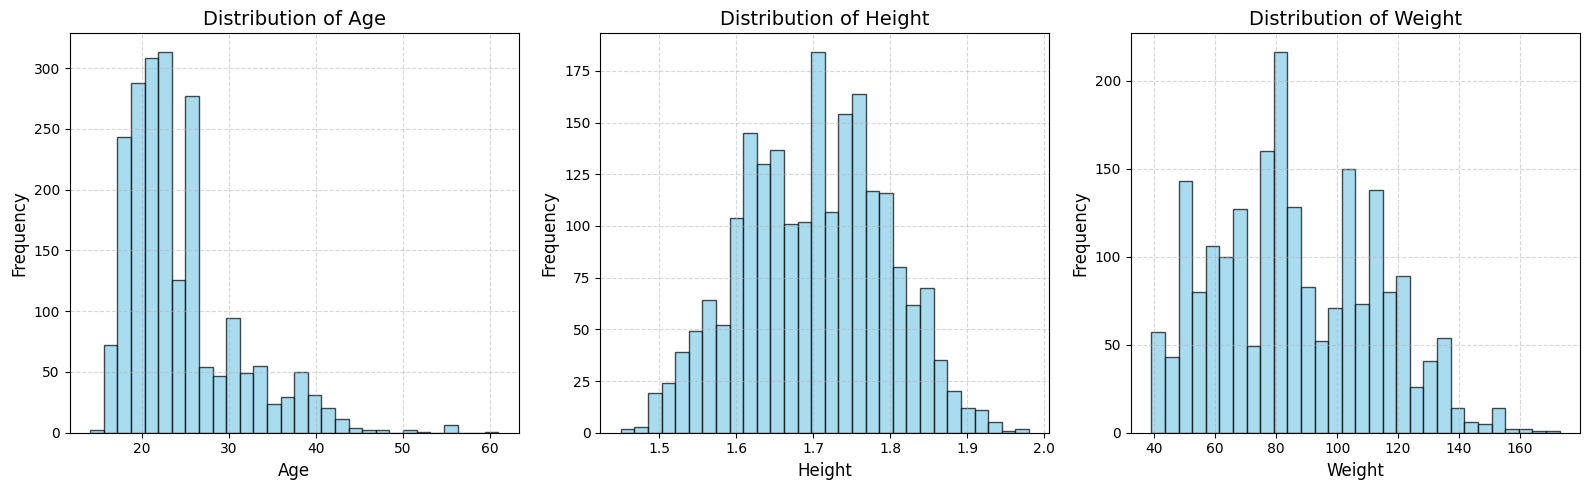

In [ ]:
# histograms: include true numeric columns
numeric_cols = ['Age', 'Height', 'Weight']

# create a 2x4 grid for subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# flatten axes array for easy iteration
axes = axes.flatten()

# plot each histogram
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    ax.hist(obesity[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

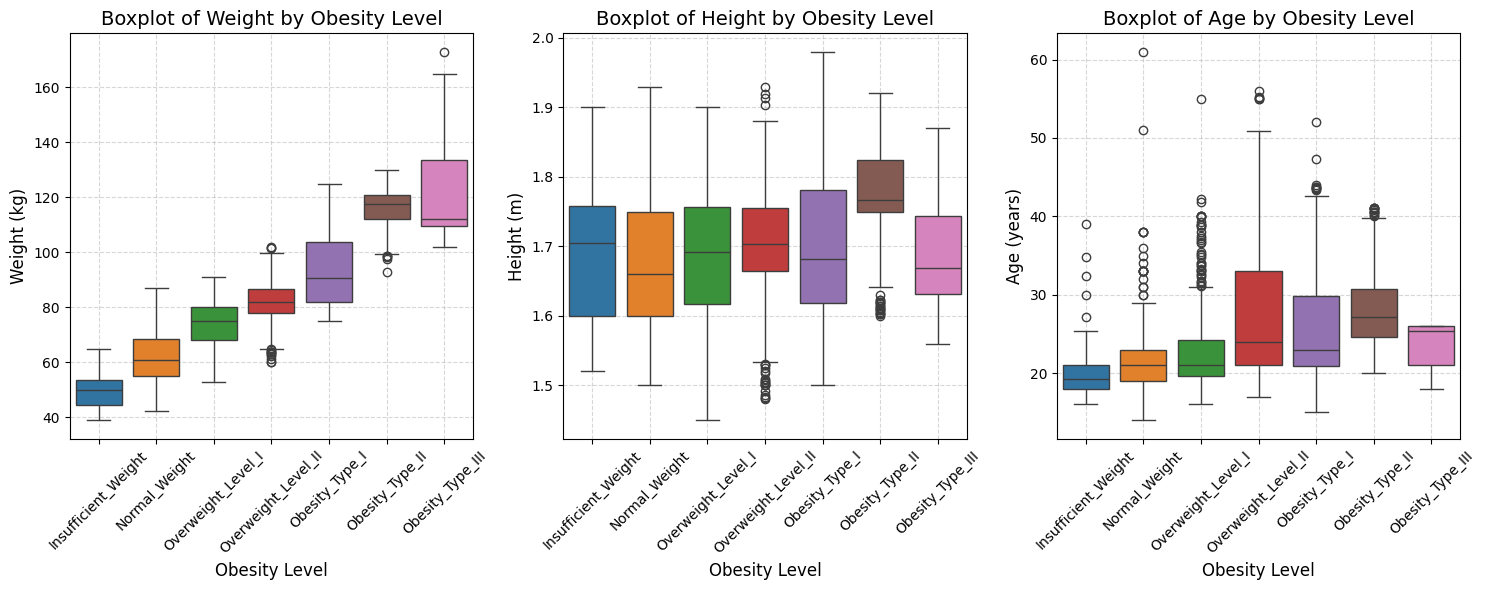

In [ ]:
# Create boxplots for Weight, Height, and Age based on NObeyesdad (obesity levels)
fig, axes = plt.subplots(1, 3, figsize=(15, 6))  # 1 row, 3 columns

# Boxplot for Weight
sns.boxplot(ax=axes[0], x='NObeyesdad', y='Weight', data=obesity, hue='NObeyesdad')
axes[0].set_title('Boxplot of Weight by Obesity Level', fontsize=14)
axes[0].set_xlabel('Obesity Level', fontsize=12)
axes[0].set_ylabel('Weight (kg)', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# Boxplot for Height
sns.boxplot(ax=axes[1], x='NObeyesdad', y='Height', data=obesity, hue='NObeyesdad')
axes[1].set_title('Boxplot of Height by Obesity Level', fontsize=14)
axes[1].set_xlabel('Obesity Level', fontsize=12)
axes[1].set_ylabel('Height (m)', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# Boxplot for Age
sns.boxplot(ax=axes[2], x='NObeyesdad', y='Age', data=obesity, hue='NObeyesdad')
axes[2].set_title('Boxplot of Age by Obesity Level', fontsize=14)
axes[2].set_xlabel('Obesity Level', fontsize=12)
axes[2].set_ylabel('Age (years)', fontsize=12)
axes[2].grid(True, linestyle='--', alpha=0.5)
axes[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



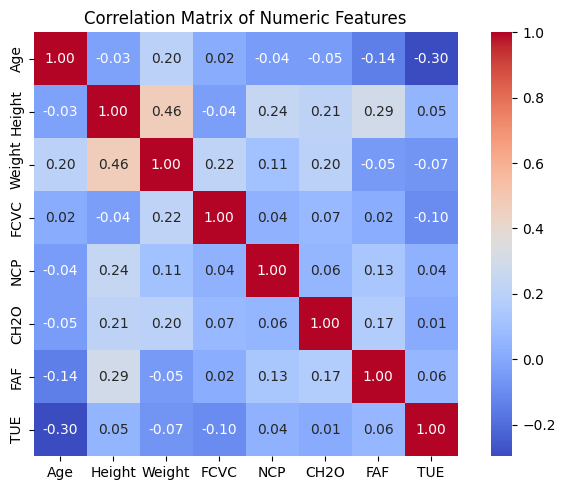

In [ ]:
# correlation matrix
# Select only numeric columns
numeric_cols = obesity.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()


# LOGISTIC REGRESSION  (Khushwant Khatri)

Cross-validation Accuracy (5-fold): 0.6115
Test Accuracy: 0.6288

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.82      0.67        56
           1       0.55      0.27      0.37        62
           2       0.62      0.62      0.62        78
           3       0.60      0.84      0.71        58
           4       0.93      1.00      0.96        63
           5       0.55      0.52      0.53        56
           6       0.45      0.28      0.35        50

    accuracy                           0.63       423
   macro avg       0.61      0.62      0.60       423
weighted avg       0.62      0.63      0.61       423


Confusion Matrix:
[[46  2  3  0  0  5  0]
 [23 17  3  2  1  9  7]
 [ 4  2 48 12  2  5  5]
 [ 1  0  6 49  0  0  2]
 [ 0  0  0  0 63  0  0]
 [ 5  7  4  7  1 29  3]
 [ 2  3 14 11  1  5 14]]


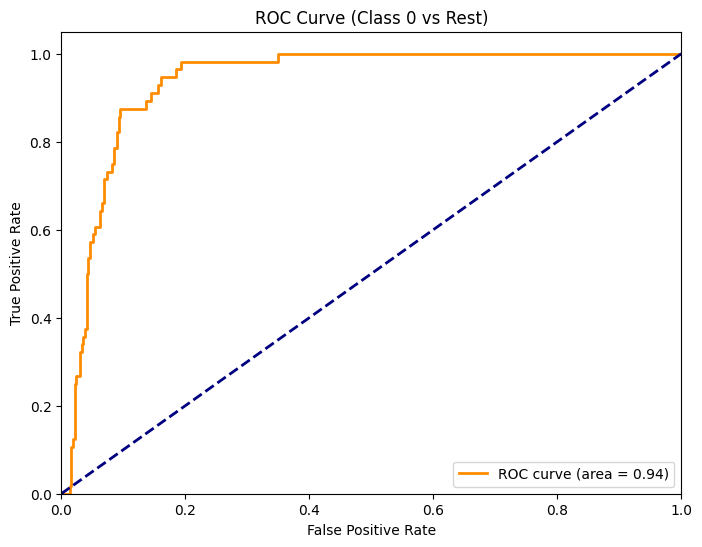

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load dataset
url = "https://archive.ics.uci.edu/static/public/544/data.csv"
data = pd.read_csv(url)

# Create BMI feature
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# One-hot encode categorical variables
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE',
                    'SCC', 'CALC', 'CAEC', 'MTRANS']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Define target and features
X = data.drop(['NObeyesdad', 'BMI', 'Weight', 'Height'], axis=1)
y = data['NObeyesdad']  # Classification target

# Encode target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=2000, solver='lbfgs')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')

print(f"Cross-validation Accuracy (5-fold): {cv_scores.mean():.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

# ROC Curve (for multi-class: plot ROC for one vs rest - example: class 0)
y_score = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test == 0, y_score[:, 0])  # Change index for other classes
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Class 0 vs Rest)')
plt.legend(loc='lower right')
plt.show()


### Logistic Interpretation:

The logistic regression model underperformed despite the dataset being artificially balanced across obesity categories. This may be due to the exclusion of Height and Weight, which are not redundant in the data and may contain independent predictive power. As part of exploratory analysis, we introduced them back into the logistic regression model, which significantly improved its performance, with an updated accuracy score of 86.52%. When Height and Weight were included, most classes had precision, recall, and F1-scores above 0.85 and the confusion matrix showed minimal misclassification.


In [ ]:
# Logistic regression with Height and Weight included
# Define target and features
X = data.drop(['NObeyesdad', 'BMI'], axis=1)
y = data['NObeyesdad']  # Classification target

# Encode target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=2000, solver='lbfgs')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')

print(f"Cross-validation Accuracy (5-fold): {cv_scores.mean():.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)


Cross-validation Accuracy (5-fold): 0.8749
Test Accuracy: 0.8652

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        56
           1       0.89      0.63      0.74        62
           2       0.93      0.88      0.91        78
           3       0.89      0.97      0.93        58
           4       1.00      1.00      1.00        63
           5       0.72      0.73      0.73        56
           6       0.74      0.84      0.79        50

    accuracy                           0.87       423
   macro avg       0.86      0.86      0.86       423
weighted avg       0.87      0.87      0.86       423


Confusion Matrix:
[[56  0  0  0  0  0  0]
 [ 9 39  0  0  0 11  3]
 [ 0  0 69  7  0  0  2]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  5  0  0  0 41 10]
 [ 0  0  3  0  0  5 42]]


# Linear Regression ( Helly Harshad Shah)

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error  # Add this

# Load data
url = "https://archive.ics.uci.edu/static/public/544/data.csv"
data = pd.read_csv(url)

# Create BMI feature
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# One-hot encode categorical variables
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE',
                    'SCC', 'CALC', 'CAEC', 'MTRANS']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Prepare features and target
X = data.drop(['NObeyesdad', 'BMI', 'Weight', 'Height'], axis=1)
y = data['BMI']

# Ensure all are float
X = X.astype(np.float64)
y = y.astype(np.float64)

# Add constant term
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Predict using the model
y_pred = model.predict(X)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))

# Show full summary
print(model.summary())


Root Mean Squared Error (RMSE): 5.66
                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     99.43
Date:                Fri, 16 May 2025   Prob (F-statistic):          3.00e-295
Time:                        20:14:45   Log-Likelihood:                -6656.2
No. Observations:                2111   AIC:                         1.336e+04
Df Residuals:                    2089   BIC:                         1.348e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

**Interpretation:**

Interpretation:
Dependent Variable: BMI

**R-squared = 0.500**
This indicates that approximately 50% of the variation in BMI is explained by the model. While this suggests the model has some explanatory power, there is still a significant portion of the variance that remains unexplained.

**Adjusted R-squared = 0.495**
The adjusted R-squared value, which accounts for the number of predictors in the model, is 0.495. This suggests that, after adjusting for the model complexity, the fit is still moderate but not perfect.

**F-statistic = 99.43, p-value < 0.001**
The F-statistic of 99.43 with a p-value less than 0.001 indicates that the overall regression model is statistically significant, meaning at least one of the predictors is significantly related to BMI.

**Number of Observations: 2111**
The model is based on data from 2,111 observations, providing a relatively large sample size.

**Log-Likelihood = -6656.2**
The log-likelihood value gives an indication of the model’s goodness of fit. In isolation, it's not very informative, but it's used in likelihood ratio tests.

**AIC = 1.336e+04, BIC = 1.348e+04**
The Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC) are model selection criteria. Lower values of AIC and BIC indicate a better-fitting model when comparing multiple models. These values can be used for model comparison, but on their own, they do not provide much insight.

**Df Model = 21, Df Residuals = 2089**
The model has 21 predictors, and the number of residual degrees of freedom is 2,089. The difference between these values is the number of predictors in the model.

**Covariance Type = nonrobust**
The standard errors of the regression coefficients are not adjusted for heteroscedasticity. If heteroscedasticity is present, these standard errors might be biased.

# K-means clustering ( Isha Thakkar )

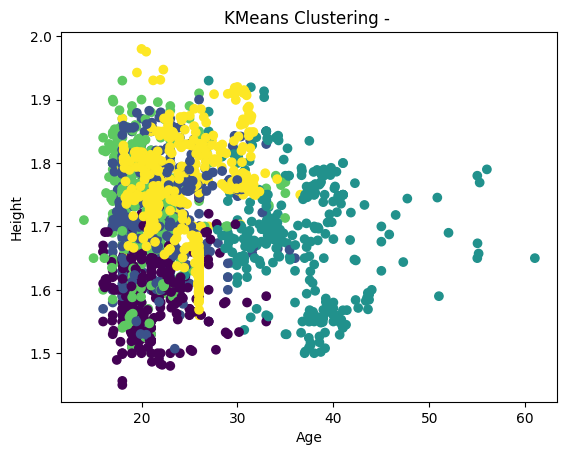

Adjusted Rand-Index: 0.191


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


obesity_numeric = obesity.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
scaler.fit(obesity_numeric)
scaled_data = scaler.transform(obesity_numeric)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)

obesity['cluster'] = kmeans.labels_

plt.scatter(obesity_numeric.iloc[:, 0], obesity_numeric.iloc[:, 1], c=obesity['cluster'], cmap='viridis')
plt.xlabel(obesity_numeric.columns[0])
plt.ylabel(obesity_numeric.columns[1])
plt.title("KMeans Clustering - ")
plt.show()

le = LabelEncoder()
labels_true = le.fit_transform(obesity['NObeyesdad'])
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels_true, kmeans.labels_))

**K-Means Clustering Interpretation** -

We applied K-Means clustering to group individuals based on their numeric features such as age, height, weight, and other physical indicators. Only numerical columns were included, and the data was standardized using StandardScaler to ensure equal weight across features. We chose 5 clusters to identify distinct lifestyle or body condition patterns.

The resulting clusters revealed meaningful groupings - some concentrated around younger individuals with normal weight and moderate activity, while others skewed toward higher weights and lower physical activity. Although the clusters do not directly map to the predefined obesity categories, they provide unsupervised insights into natural groupings in the population based on lifestyle and physical condition. This can be useful for targeted health recommendations and early intervention strategies, especially when labeled data is unavailable.

# **Random Forest** (Khan Yunus)

Accuracy Score: 0.9550827423167849
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.98      0.96      0.97        56
      Normal_Weight       0.89      0.90      0.90        62
     Obesity_Type_I       0.99      0.97      0.98        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.88      0.89      0.88        56
Overweight_Level_II       0.98      0.96      0.97        50

           accuracy                           0.96       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.96      0.96      0.96       423



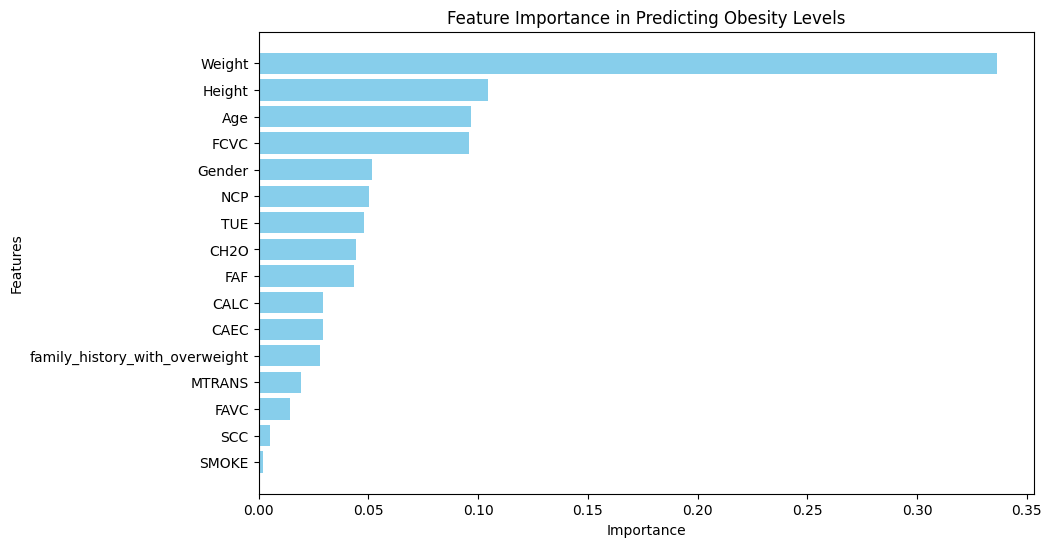

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("https://archive.ics.uci.edu/static/public/544/data.csv")


# Handle binary categorical columns (replace 'yes'/'no' with 1/0)
binary_columns = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']  # List binary columns

for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Label encoding for categorical columns
label_encoder = LabelEncoder()

# Encode remaining categorical columns with LabelEncoder
categorical_columns = ['Gender', 'CAEC', 'CALC', 'MTRANS']  # Add any other categorical columns if needed
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Features (X) and target (y)
X = df.drop('NObeyesdad', axis=1)  # Drop the target column
y = df['NObeyesdad']  # Target column

# Split into training and test datasets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Predicting Obesity Levels')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# SVM  (Vibha Gokhale)

In [ ]:
# import packages
import pandas as pd
import numpy as np
import pprint as pp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# load data
obesity = pd.read_csv("https://archive.ics.uci.edu/static/public/544/data.csv")

# review distribution of target values
obesity['NObeyesdad'].value_counts()

# Encode categorical variables
# binary categorical columns: replace 'yes'/'no' with 1/0
binary_columns = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for col in binary_columns:
    obesity[col] = obesity[col].map({'yes': 1, 'no': 0})

# one-hot encode nominal categorical variables (without dropping the first category for consistency across all models)
obesity = pd.get_dummies(obesity, columns=['Gender', 'CAEC', 'CALC', 'MTRANS'], drop_first=False)

# Encode target variable (obesity levels)
label_encoder = LabelEncoder()
obesity['NObeyesdad'] = label_encoder.fit_transform(obesity['NObeyesdad'])

# separate independent and dependent variables
X = obesity.drop('NObeyesdad', axis=1)
y = obesity['NObeyesdad']

# instantiate StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# split into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train model with default hyperparameters (RBF kernel)
classifier = SVC()

# fit the model
classifier.fit(X_train, y_train)

# evaluate model:
model_preds = classifier.predict(X_test)
model_accuracy = accuracy_score(y_test, model_preds)
print(f"SVC (with default RBF kernel) score: {round((model_accuracy * 100), 3)}%")

# train model with linear kernel
classifier = SVC(kernel='linear')

# fit the model
classifier.fit(X_train, y_train)

# evaluate the updated model
model_preds = classifier.predict(X_test)
model_accuracy = accuracy_score(y_test, model_preds)
print(f"SVC (with linear kernel) score: {round((model_accuracy * 100), 3)}%")

# feature importance
feature_importance = pd.Series(classifier.coef_[0], index=obesity.drop('NObeyesdad', axis=1).columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)

# top 10 features
top_features_df = top_features.head(10).reset_index()
top_features_df.columns = ['Feature', 'Importance']
top_features_df.style.background_gradient(cmap='Blues').set_caption("Top 10 Features by SVM Coefficient")

SVC (with default RBF kernel) score: 83.754%
SVC (with linear kernel) score: 93.849%


,Feature,Importance
0,Weight,6.663700
1,Height,1.558450
2,CAEC_Always,0.199455
3,Age,0.190714
4,FCVC,0.155934
5,CAEC_Frequently,0.155846
6,CH2O,0.148100
7,TUE,0.141319
8,MTRANS_Automobile,0.111468
9,CALC_Frequently,0.110998


### SVM Interpretation

The SVM model was trained on standardized data and evaluated using two different kernels: a Radial Basis Function (RBF) kernel with default hyperparameters, and a Linear kernel to understand feature importance and improve interpretability. The Support Vector Machine with the RBF kernel achieved an accuracy score of 83.74% on the test set, while the model using the Linear kernel performed significantly better, achieving an accuracy score of 93.85%.

The ten most important features in predicting obesity, based on the magnitude of the absolute coefficients from the linear SVM model, are shown in the table. These results show that Weight and Height are the most influential predictors, with lifestyle factors such as eating habits and mode of transport also contributing significantly


# Hierarchical Clustering (Vibha Gokhale)

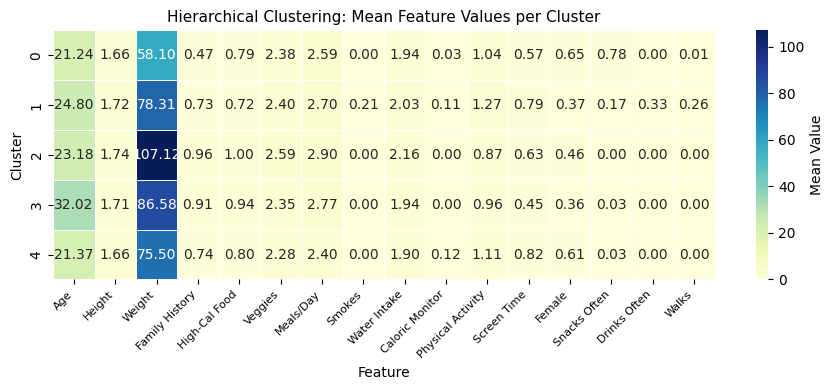

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# perform hierarchical clustering using AgglomerativeClustering; n=5 to ensure compatibility with kmeans for ARI comparison.
agg_clust = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters = agg_clust.fit_predict(X)

# add the cluster labels to the original dataframe (optional)
obesity['Cluster'] = clusters

# Show cluster means
# rename columns for readability
col_rename = {
    'family_history_with_overweight': 'Family History',
    'FAVC': 'High-Cal Food',
    'FCVC': 'Veggies',
    'NCP': 'Meals/Day',
    'SMOKE': 'Smokes',
    'CH2O': 'Water Intake',
    'SCC': 'Caloric Monitor',
    'FAF': 'Physical Activity',
    'TUE': 'Screen Time',
    'Gender_Female': 'Female',
    'CAEC_Frequently': 'Snacks Often',
    'CALC_Frequently': 'Drinks Often',
    'MTRANS_Walking': 'Walks'
}

# apply renaming to a copy of the original dataframe
obesity_renamed = obesity.rename(columns=col_rename)

# choose selected variables for visualization
selected_cols = ['Age', 'Height', 'Weight', 'Family History', 'High-Cal Food',
                 'Veggies', 'Meals/Day', 'Smokes', 'Water Intake',
                 'Caloric Monitor', 'Physical Activity', 'Screen Time',
                 'Female', 'Snacks Often', 'Drinks Often', 'Walks']

# create cluster summary (assumes obesity['Cluster'] exists)
cluster_summary = obesity_renamed.groupby('Cluster')[selected_cols].mean().round(2)

# plot heatmap
plt.figure(figsize=(9, 4))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.4,
            cbar_kws={'label': 'Mean Value'})
plt.title("Hierarchical Clustering: Mean Feature Values per Cluster", fontsize=11)
plt.xlabel("Feature",)
plt.ylabel("Cluster")
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()


### Interpretation

We applied agglomerative clustering to the standardized data and identified 5 meaningful clusters. We chose 5 clusters to ensure compatibility with our K-Means model and to allow for a meaningful comparison of ARI scores between the two methods.

These clusters revealed distinct patterns in weight, eating habits, physical activity, and other health-related behaviors, as shown in the heatmap of mean feature values per cluster. For example, Cluster 2 includes individuals with the highest average weight, frequent eating habits, and low physical activity. In contrast, Cluster 0 contains individuals with the lowest average weight, higher physical activity levels, and less screen time.

The ARI score is 0.14, suggesting low similarity between the unsupervised clusters and actual obesity levels. However, the distinct cluster profiles suggest that clustering may help tailor health interventions to specific behavioral profiles.


# DECISION TREE  (Cristina Moreno)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv("https://archive.ics.uci.edu/static/public/544/data.csv")


# Handle binary categorical columns (replace 'yes'/'no' with 1/0)
binary_columns = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']  # List binary columns

for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Label encoding for categorical columns
label_encoder = LabelEncoder()

# Encode remaining categorical columns with LabelEncoder
categorical_columns = ['Gender', 'CAEC', 'CALC', 'MTRANS']  # Add any other categorical columns if needed
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Features (X) and target (y)
X = df.drop('NObeyesdad', axis=1)  # Drop the target column
y = df['NObeyesdad']  # Target column

# Split into training and test datasets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.933806146572104
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.92      0.96      0.94        56
      Normal_Weight       0.84      0.87      0.86        62
     Obesity_Type_I       0.96      0.92      0.94        78
    Obesity_Type_II       0.95      0.95      0.95        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.91      0.88      0.89        56
Overweight_Level_II       0.96      0.96      0.96        50

           accuracy                           0.93       423
          macro avg       0.93      0.93      0.93       423
       weighted avg       0.93      0.93      0.93       423



**Interpretation:**

This model demonstrates good overall performance with an accuracy of 93.38%. It effectively distinguishes between obesity categories, with some classes, like Obesity_Type_III, performing exceptionally well. The performance is slightly lower for Normal_Weight and Overweight_Level_I, but still within acceptable ranges. The balanced metrics suggest that the model is robust and handles all classes with a reasonable degree of success.

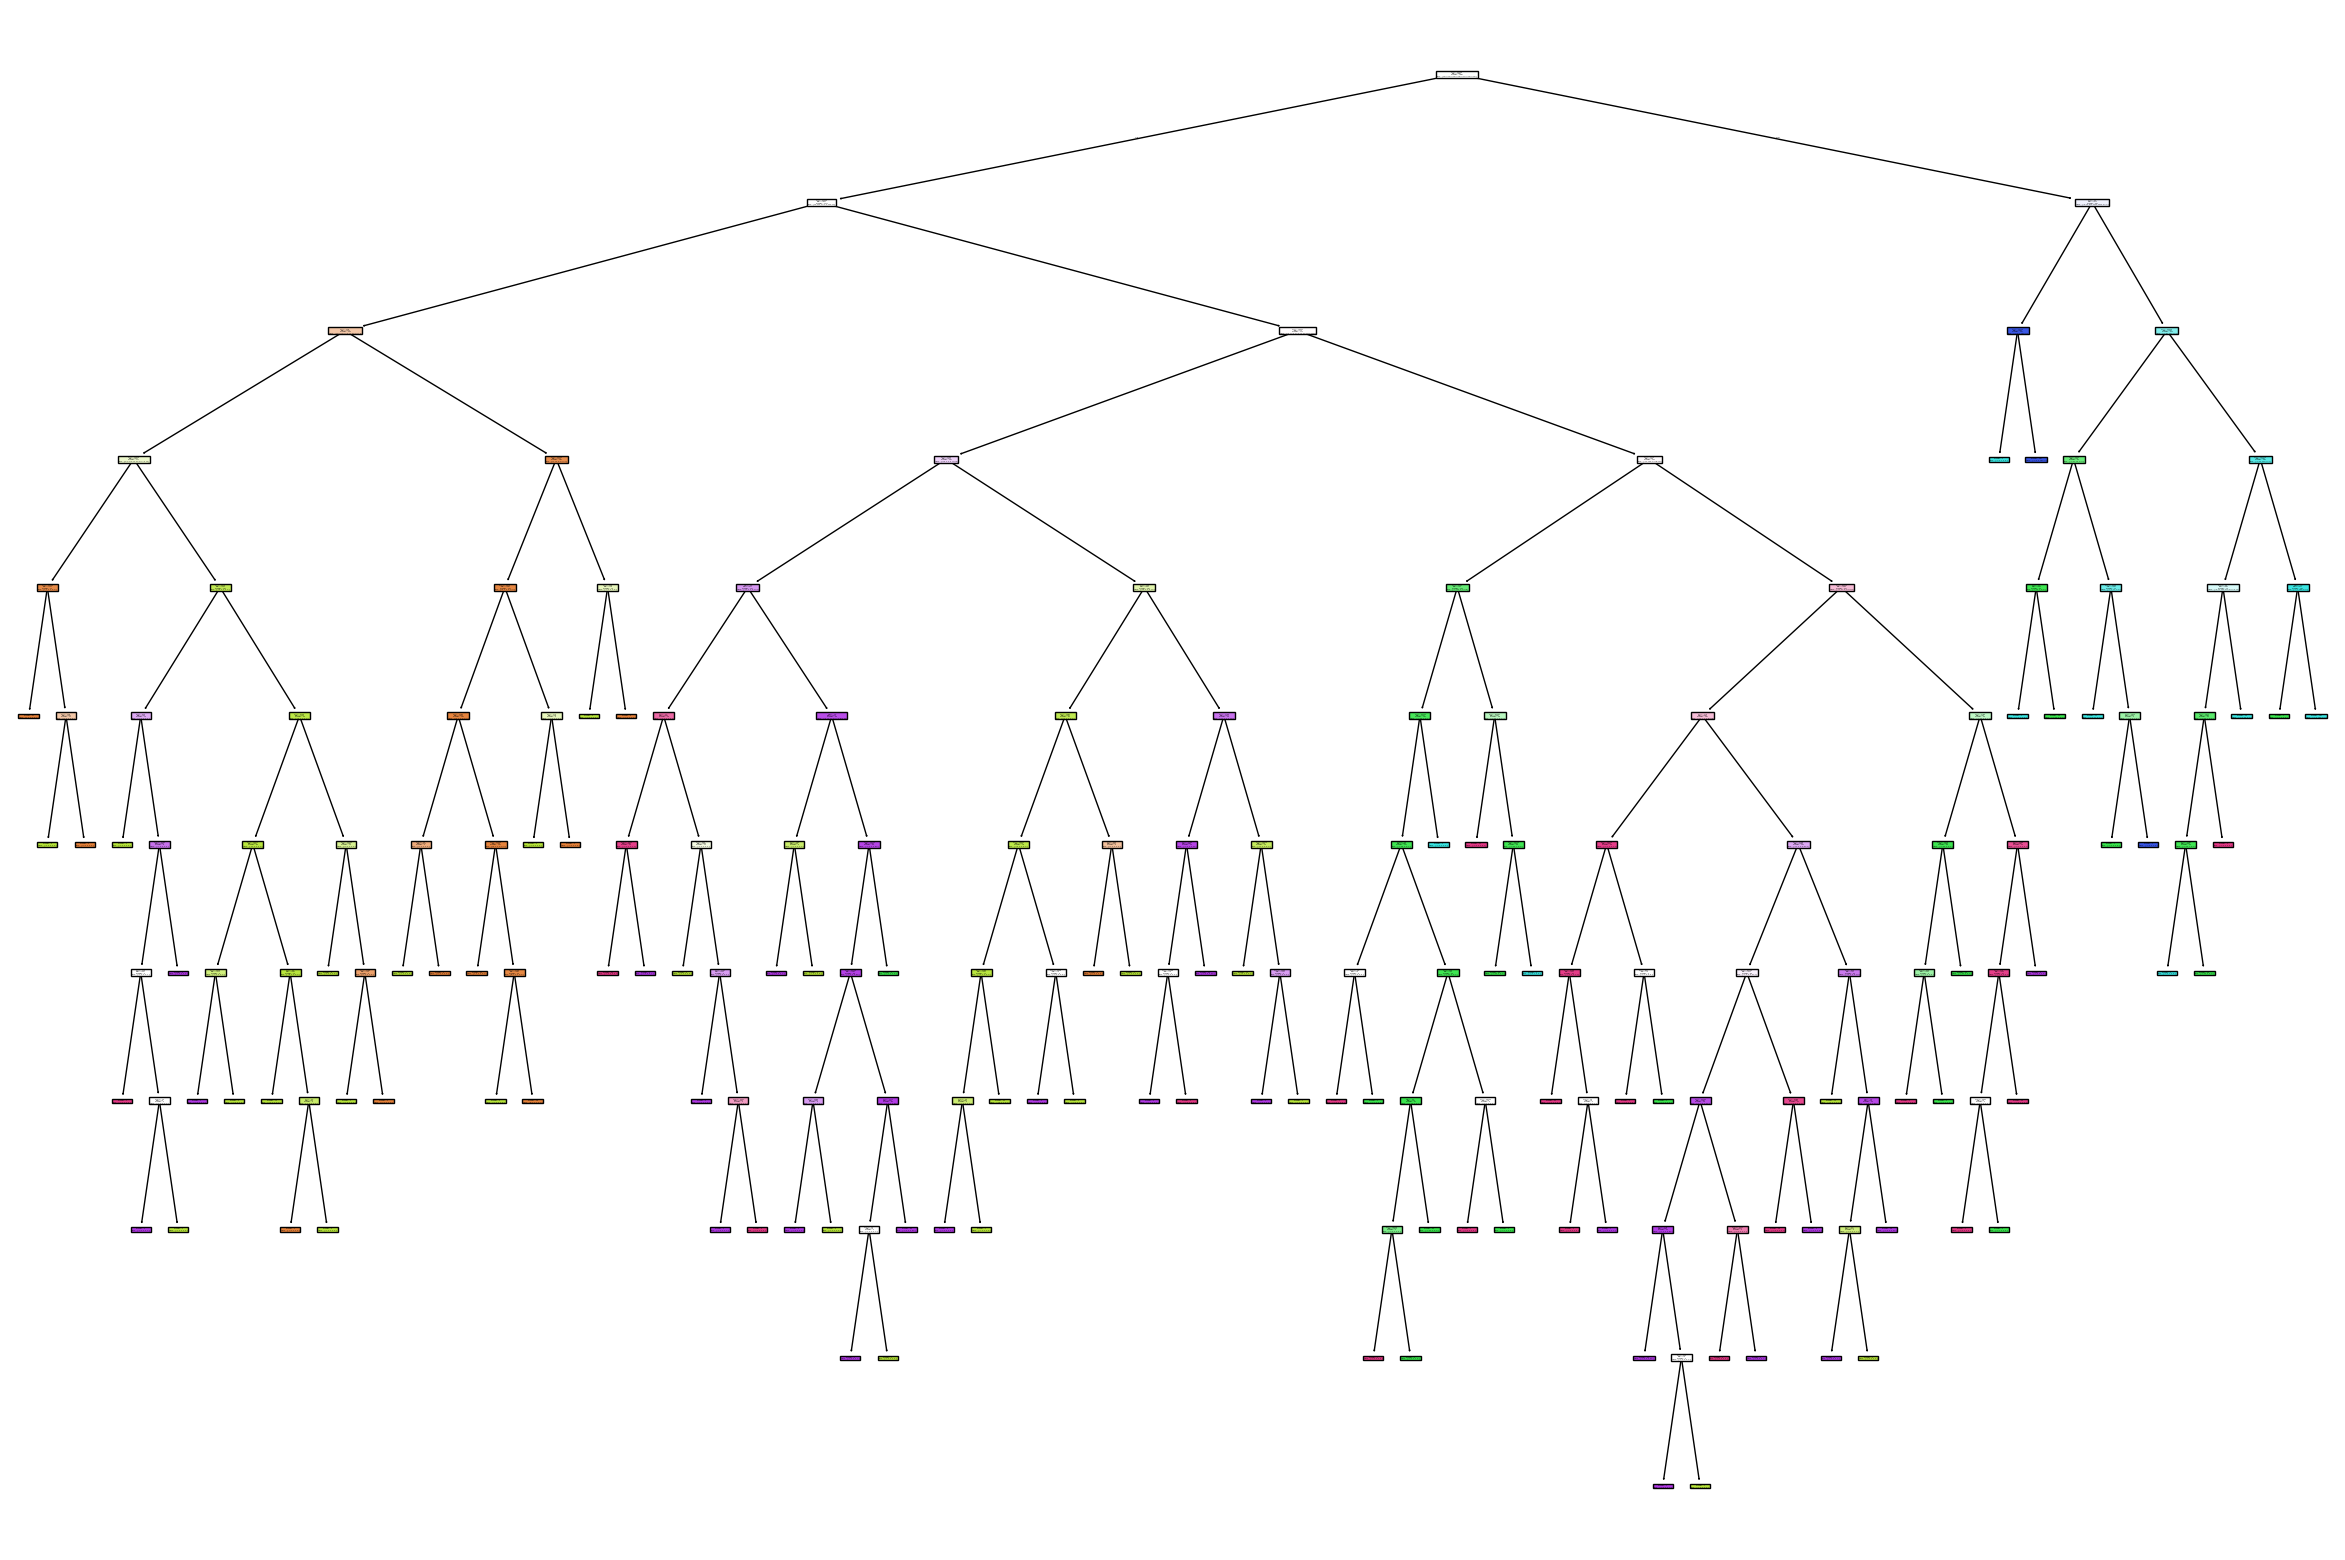

In [ ]:
# Plot the decision tree
plt.figure(figsize=(30, 20))
plot_tree(dt_model, filled=True)
plt.show()